In [ ]:
This is an attempt to show climate variations at a Global level from 1913 to 2013 using existing dataframes.

In [54]:
import sys
print('Python: {}'.format(sys.version))
import numpy as np # linear algebra
print "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
print "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__
import scipy as sp
print "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__
import matplotlib as mpl
print "Mapltolib version:    %6.6s (need at least 1.2.1)" % mpl.__version__
import matplotlib.pyplot as plt
import seaborn as sns
print "seaborn version:    %6.6s (need at least 1.2.1)" % sns.__version__
from subprocess32 import check_output
import warnings
warnings.filterwarnings('ignore')
import sklearn
print "Scikit-Learn version: %6.6s (need at least 0.13.1)" % sklearn.__version__
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


Python: 2.7.13 |Anaconda custom (64-bit)| (default, Dec 19 2016, 13:29:36) [MSC v.1500 64 bit (AMD64)]
Numpy version:        1.12.0 (need at least 1.7.1)
Pandas version:       0.19.2 (need at least 0.11.0)
SciPy version:        0.18.1 (need at least 0.12.0)
Mapltolib version:     2.0.0 (need at least 1.2.1)
seaborn version:     0.7.1 (need at least 1.2.1)
Scikit-Learn version: 0.18.1 (need at least 0.13.1)


In [55]:
from IPython.core.display import HTML
HTML("""
<style>

div.cell { /* Tunes the space between cells */
margin-top:1em;
margin-bottom:1em;
}

div.text_cell_render h1 { /* Main titles bigger, centered */
font-size: 2.2em;
line-height:1.4em;
text-align:center;
}

div.text_cell_render h2 { /*  Parts names nearer from text */
margin-bottom: -0.4em;
}


div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.5em;
line-height:1.4em;
padding-left:3em;
padding-right:3em;
}
</style>
""")

Let's take a look at the top 5 Hottest and Coldest cities of 1913 and 2013.

Average Temperature of 5 Coldest Cities of 1913 and 2013

In [58]:
##five Coldest major cities in 1913
dfTempByMajorCity = pd.read_csv('GlobalLandTemperaturesByMajorCity.csv',index_col='dt',parse_dates=[0])
#remove all the rows where there is no temperature available 
dfTempByMajorCity1=dfTempByMajorCity.dropna() 
year=dfTempByMajorCity1.index.year

a=dfTempByMajorCity1[dfTempByMajorCity1.index.year == 1913][['City','Country','AverageTemperature']].groupby(['City','Country']).mean().sort_values('AverageTemperature',ascending=True).head()
#dfTempByMajorCity1[['Country','AverageTemperature']].groupby(['Country',year]).mean().head(50)


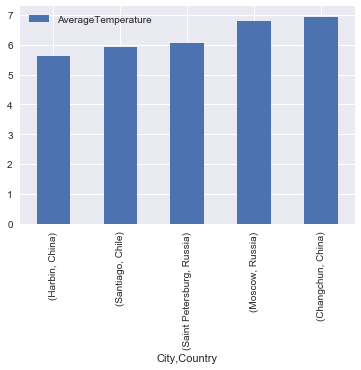

In [57]:
##five Coldest major cities in 2013

a=dfTempByMajorCity1[dfTempByMajorCity1.index.year == 2013][['City','Country','AverageTemperature']].groupby(['City','Country']).mean().sort_values('AverageTemperature',ascending=True).head().plot.bar()
b=dfTempByMajorCity1[dfTempByMajorCity1.index.year == 1913][['City','Country','AverageTemperature']].groupby(['City','Country']).mean().sort_values('AverageTemperature',ascending=False).head()
#plot.bar(a)

Now, Lets pull the data for top 5 Hottest Cities in 1913 and 2013

In [4]:
##five Hottest major cities in 1913
dfTempByMajorCity1[dfTempByMajorCity1.index.year == 1913][['City','Country','AverageTemperature']].groupby(['City','Country']).mean().sort_values('AverageTemperature',ascending=False).head()

,,AverageTemperature
City,Country,
Madras,India,28.586500
Umm Durman,Sudan,28.329583
Bangkok,Thailand,27.094750
Hyderabad,India,27.030500
Ho Chi Minh City,Vietnam,26.921500


In [5]:
##five Hottest major cities in 2013
dfTempByMajorCity1[dfTempByMajorCity1.index.year == 2013][['City','Country','AverageTemperature']].groupby(['City','Country']).mean().sort_values('AverageTemperature',ascending=False).head()


,,AverageTemperature
City,Country,
Umm Durman,Sudan,30.650500
Madras,India,30.411750
Bangkok,Thailand,28.984750
Jiddah,Saudi Arabia,28.875875
Hyderabad,India,28.851250


In [6]:
#read temperatures by City files
dfTempByCity = pd.read_csv('GlobalLandTemperaturesByCity.csv')

If we compare the data from 1913 and 2013 for both Hottest and Coldest cities,We can see there is a significant rise in temperature

In the next section,  we will look at the comparison of mean temperature of Atlanta from 1913 to till date, It shows an upward trend of rising temeratures in last century

In [7]:

#clean rows with no temperature data
dfTempByCity=dfTempByCity.dropna()
#parse date column for year and month
dfTempByCity['dt'] = pd.to_datetime(dfTempByCity['dt'])
dfTempByCity['year'] = dfTempByCity['dt'].dt.year
dfTempByCity['month'] = dfTempByCity['dt'].dt.month
#filter data for only Atlanta
dfTempByCity=dfTempByCity[dfTempByCity['City'] == 'Atlanta']


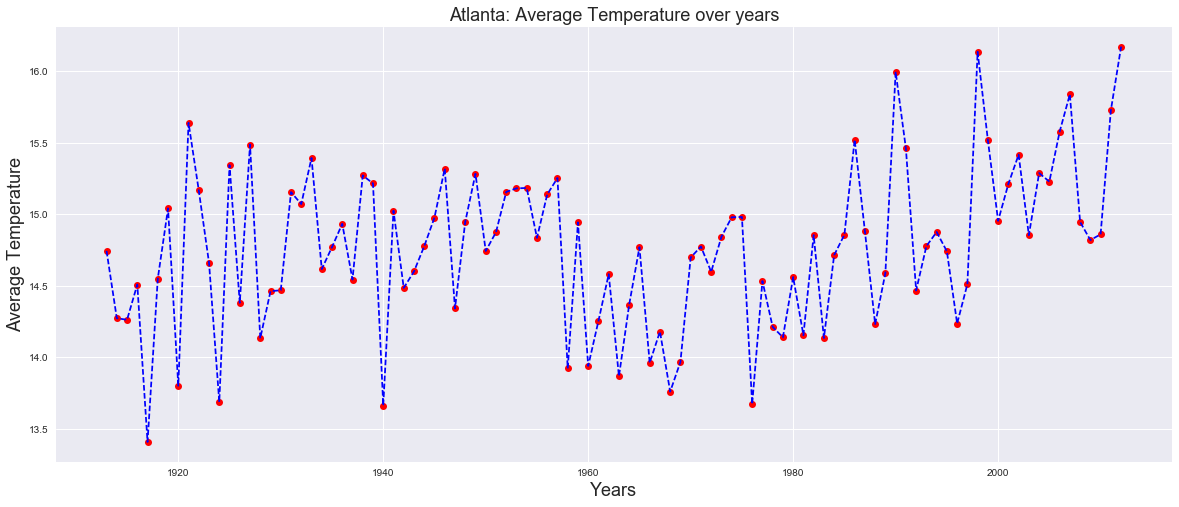

In [12]:
#This is done for 100 years of data to see change in temperature in last one century. 
time_period=range(1913,2013)

#Define an empty dictionary to hold key:value as Year:Avg Temp
dictYearTemp = {}

#Append Yearly(mean) Avg. Temp to dictionary
for year in time_period:
    dictYearTemp[year] = (dfTempByCity[dfTempByCity['year']==year]['AverageTemperature'].mean())

#plot a normal graph showing variations in Mean Average Temperatures over the years for Atlanta
plt.figure(figsize=(20,8))
plt.plot(dictYearTemp.keys(),dictYearTemp.values(), "o", color ='r' )
plt.plot(dictYearTemp.keys(),dictYearTemp.values(), 'k--', color ='b')
plt.xlabel('Years',fontsize=18)
plt.ylabel('Average Temperature',fontsize=18)
plt.title('Atlanta: Average Temperature over years',fontsize=18)



Let's put this in a broader context- Lets distribute the the yearly data between seasons and plot the seasonal temperature mean starting from year 1913 to 2013

In [22]:
#read the file
dfTemp = pd.read_csv('GlobalLandTemperaturesByCity.csv')
#filter the files by needed columns
dfTemp = dfTemp[['dt', 'AverageTemperature','City']]
#filter the file for only data for Atlanta
dfTemp = dfTemp[dfTemp['City']=='Atlanta']
#Parse the date into year and Month
dfTemp['dt'] = pd.to_datetime(dfTemp['dt'])
dfTemp['year'] = dfTemp['dt'].dt.year
dfTemp['month'] = dfTemp['dt'].dt.month
#Filter the file for only data from 1913 onwards
dfTemp=dfTemp[dfTemp['year'] >=1913]

#function to defie Seasons
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
# calculate min year and max year 
min_year = dfTemp['year'].min()
max_year = dfTemp['year'].max()
years = range(min_year, max_year + 1)

# Define new Columns with data distributed for seasons
dfTemp['season'] = dfTemp['month'].apply(get_season)
#empty Dictionary for each seasons
spring_temps = {}
summer_temps = {}
autumn_temps = {}
winter_temps = {}
#append dictionary with season and their yearly mean temperatures.
for x in years:
    curr_year_data = dfTemp[dfTemp['year'] == x]
    spring_temps[x] = (curr_year_data[curr_year_data['season'] == 'spring']['AverageTemperature'].mean())
    summer_temps[x] = (curr_year_data[curr_year_data['season'] == 'summer']['AverageTemperature'].mean())
    autumn_temps[x] = (curr_year_data[curr_year_data['season'] == 'autumn']['AverageTemperature'].mean())
    winter_temps[x] = (curr_year_data[curr_year_data['season'] == 'winter']['AverageTemperature'].mean())


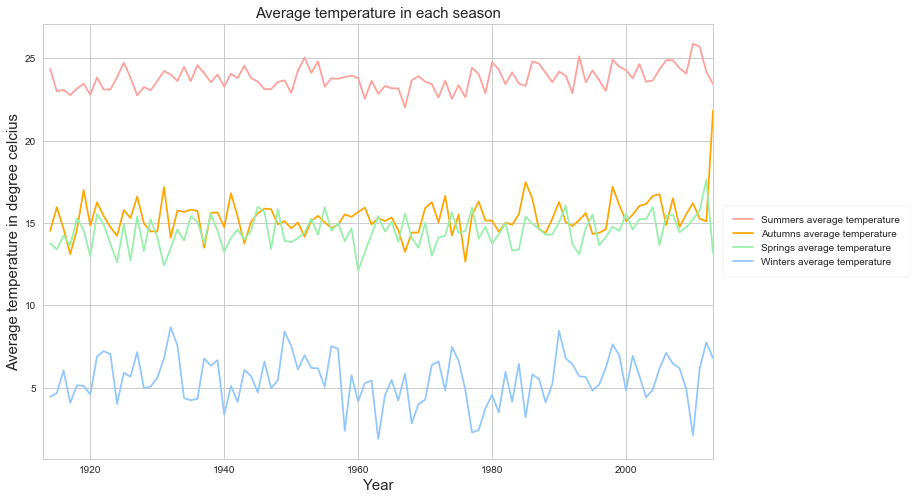

In [47]:
#use seaborn to define grid
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
#use Matplotlib to plt line graph for each season
f, ax = plt.subplots(figsize=(12, 8))
#plot mean of each season
plt.plot(summer_temps.keys(), summer_temps.values(), label='Summers average temperature', color='r')
plt.plot(autumn_temps.keys(), autumn_temps.values(), label='Autumns average temperature', color='orange')
plt.plot(spring_temps.keys(), spring_temps.values(), label='Springs average temperature', color='g')
plt.plot(winter_temps.keys(), winter_temps.values(), label='Winters average temperature', color='b')
#define x limit from 1913 to 2013
plt.xlim(1913, max_year)

ax.set_ylabel('Average temperature in degree celcius',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
ax.set_title('Average temperature in each season',fontsize=15)
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

In the above plot, There is a lot of variation in temperature on season level and it looks like temperature for Atlanta has been consistent for last century but There is still a considerable spike in Autumn temperature in recent years.

Now, we will analyze data on country level and try to see which countries have and been affected most by Climate Change

In [45]:
#read csv file
global_temp_country = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
#global_temp_country

In [46]:
#Let's remove the duplicated countries and countries for which no information about the temperature

global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Antarctica'])]
#clean the data and replace below names with correct country names
global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])
#Remove the rows where there is no temperature data available
global_temp_country_clear.dropna()

#Let's average temperature for each country

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


In [39]:
# #Plot Globe with each country and its mean temperature for last 10 years
# data = [ dict(
#         type = 'choropleth',
#         locations = countries,
#         z = mean_temp,
#         locationmode = 'country names',
#         text = countries,
#         marker = dict(
#             line = dict(color = 'rgb(0,0,0)', width = 1)),
#             colorbar = dict(autotick = True, tickprefix = '',
#             title = '# Average\nTemperature,\n°C'),
#         #The following line is also needed to create Stream
#         #stream = stream_id
#             )
#        ]

# layout = dict(
#     title = 'Average land temperature in countries',
#     geo = dict(
#         showframe = True,
#         showocean = True,
#         oceancolor = 'rgb(0,255,255)',
#         projection = dict(
#         type = 'orthographic',
#             rotation = dict(
#                     lon = 60,
#                     lat = 10),
#         ),
#         lonaxis =  dict(
#                 showgrid = True,
#                 gridcolor = 'rgb(102, 102, 102)'
#             ),
#         lataxis = dict(
#                 showgrid = True,
#                 gridcolor = 'rgb(102, 102, 102)'
#                 )
#     ),
# )

# fig = dict(data=data, layout=layout)
# py.iplot(fig, validate=False, filename='world_temp_map')

In [93]:
#Using plotly we will plot world map and color code each country 
data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
        #The following line is also needed to create Stream
        #stream = stream_id
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(176,196,222)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='world_temp_map')

 Is there a global warming?

Lets look at the world Land temperatures and compare mean's of last 100 years

In [104]:
Temp_data=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

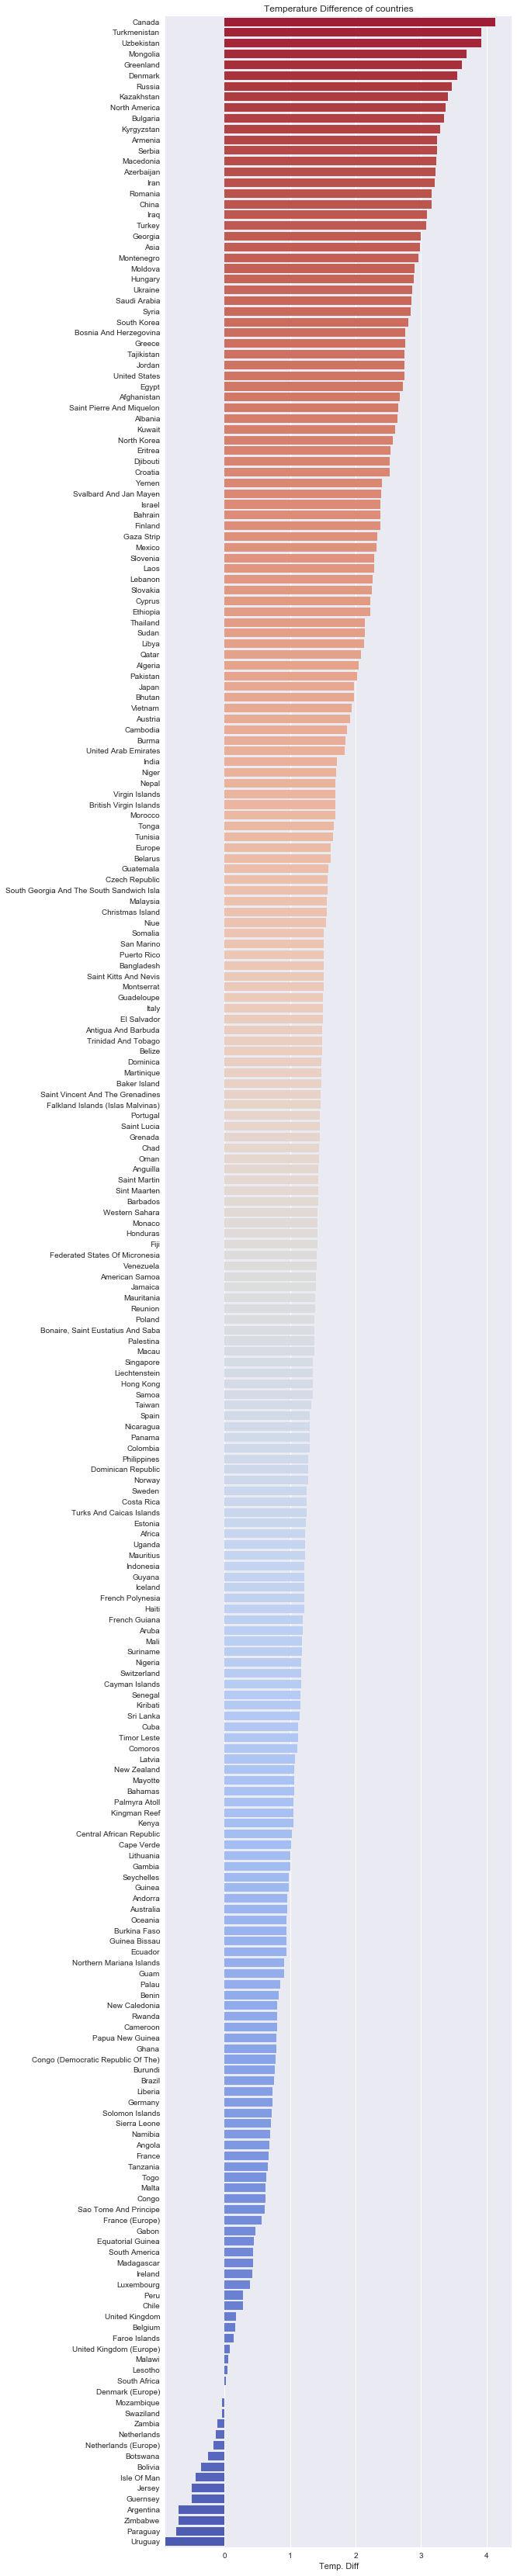

In [105]:
#Parse the date column to fetch year
Temp_data['dt']=pd.to_datetime(Temp_data.dt)
Temp_data['year']=Temp_data['dt'].map(lambda x: x.year)
#remove rwos with no temperature data
Temp_data=Temp_data.dropna()
#group temperature by year and country
grouped_data=Temp_data['AverageTemperature'].groupby([Temp_data['year'],Temp_data['Country']]).mean()
#store group data to grouped dictionary
grouped_dict=grouped_data.to_dict()
#define emp
Temp={}
countries=Temp_data['Country'].unique()


#adding year 1913 as data for 1750 doesn't contain many countries.
firstYeardata=grouped_data[1913]
lastYeardata=grouped_data[2013]


#removing out the countries whose data is available in only one time period
for country in countries:
    if (country in firstYeardata)==True and (country in lastYeardata)==True:
        Temp[country]=(lastYeardata[country]-firstYeardata[country])

Temp1=sorted(Temp.items(),key=lambda x: x[1],reverse=True) 

Countries_list=[x for x,y in Temp1]
Temp_diff=[y for x,y in Temp1]

#Plotting
sns.set(font_scale=1.0) 
f, ax = plt.subplots(figsize=(8, 60))
colors_cw = sns.color_palette('coolwarm', len(Countries_list))
sns.barplot(Temp_diff,Countries_list, palette = colors_cw[::-1])
Text = ax.set(xlabel='Temp. Diff', title='Temperature Difference of countries')

Above graph shows countries affected by Climate change in descending order, Canada , Greenland seems to be affected the most, This proves that Land Temperatures have been increasing at an exponential rate in the past Century

Now, we know that Climate change is Real but by what degree and what time has been a major contributer towards Climate change, Below we will try to plot the timeline and temperature increase on Global Scale

2015
average_temp=0.000000years+(-0.000000)


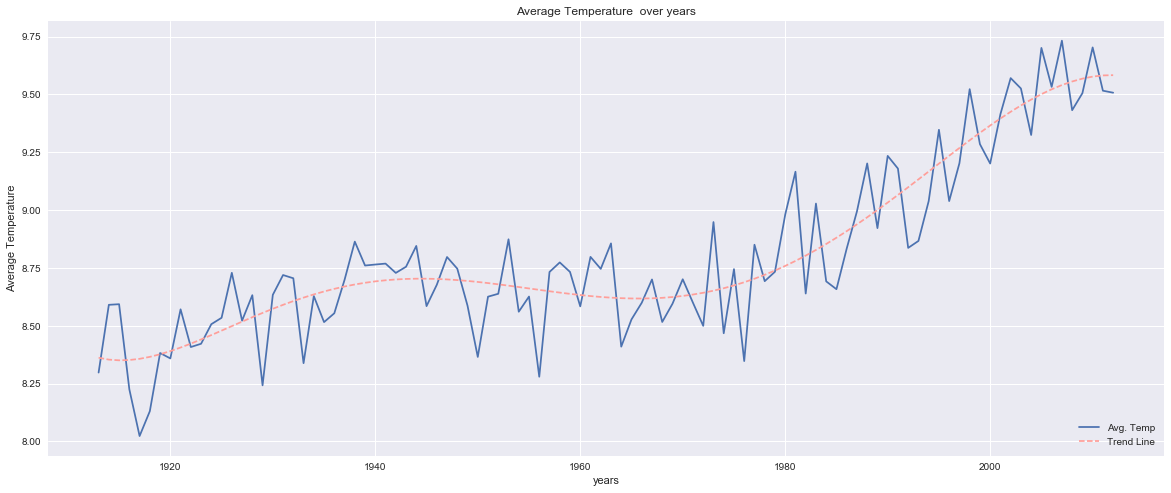

In [106]:
Temp_data=pd.read_csv('GlobalTemperatures.csv')
#reading file using pandas

#sorting out data 

Temp_data['dt']=pd.to_datetime(Temp_data.dt)
Temp_data['year']=Temp_data['dt'].map(lambda x: x.year)

#This is done for 100 years of data to see change in temperature in last one century. 
print(Temp_data['year'].max())   #2013
time_period=range(1913,2013)

average_temp=[]
for year in time_period:
    average_temp.append(Temp_data[Temp_data['year']==year]['LandAverageTemperature'].mean())

#plotting
plt.figure(figsize=(20,8))
plt.plot(time_period,average_temp, label='Avg. Temp')
plt.xlabel('years')
plt.ylabel('Average Temperature')
plt.title('Average Temperature  over years')

#Adding Trendline

z=np.polyfit(time_period,average_temp,10)
p = np.poly1d(z)
plt.plot(time_period,p(time_period),"r--",label='Trend Line')
print("average_temp=%.6fyears+(%.6f)"%(z[0],z[1]))
plt.legend(loc=4)
plt.show()

Above Graph clearly states and there has been several up's and down's in past century but with the data in hand , we can conclude that there has been as exponential increase in temperature since 1980 and trend is evermore increasing.


In [62]:
import functools
reader = functools.partial(pd.read_csv, parse_dates='dt'.split())
country = reader('GlobalLandTemperaturesByCountry.csv').dropna()
# city = reader('../input/GlobalLandTemperaturesByCity.csv')
# major_city = reader('../input/GlobalLandTemperaturesByMajorCity.csv')
country

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01 00:00:00,4.384,2.294,Åland
5,1744-04-01 00:00:00,1.530,4.680,Åland
6,1744-05-01 00:00:00,6.702,1.789,Åland
7,1744-06-01 00:00:00,11.609,1.577,Åland
8,1744-07-01 00:00:00,15.342,1.410,Åland
10,1744-09-01 00:00:00,11.702,1.517,Åland
11,1744-10-01 00:00:00,5.477,1.862,Åland
12,1744-11-01 00:00:00,3.407,1.425,Åland
13,1744-12-01 00:00:00,-2.181,1.641,Åland
14,1745-01-01 00:00:00,-3.850,1.841,Åland


In [72]:
india = country[country.Country == 'India']
india.set_index(['dt'], inplace=True)
india

,AverageTemperature,AverageTemperatureUncertainty,Country
dt,,,
1796-01-01 00:00:00,17.044,2.044,India
1796-02-01 00:00:00,19.193,1.359,India
1796-03-01 00:00:00,22.319,2.125,India
1796-04-01 00:00:00,27.233,1.510,India
1796-05-01 00:00:00,30.035,1.338,India
1796-06-01 00:00:00,29.261,2.953,India
1796-07-01 00:00:00,26.800,2.190,India
1796-08-01 00:00:00,26.558,2.866,India
1796-09-01 00:00:00,25.958,3.275,India


In [75]:
india_avg = india.AverageTemperature
india.iloc[:,2]

dt
1796-01-01 00:00:00    India
1796-02-01 00:00:00    India
1796-03-01 00:00:00    India
1796-04-01 00:00:00    India
1796-05-01 00:00:00    India
1796-06-01 00:00:00    India
1796-07-01 00:00:00    India
1796-08-01 00:00:00    India
1796-09-01 00:00:00    India
1796-10-01 00:00:00    India
1796-11-01 00:00:00    India
1796-12-01 00:00:00    India
1797-03-01 00:00:00    India
1797-04-01 00:00:00    India
1797-05-01 00:00:00    India
1797-06-01 00:00:00    India
1797-07-01 00:00:00    India
1797-08-01 00:00:00    India
1797-09-01 00:00:00    India
1797-10-01 00:00:00    India
1797-11-01 00:00:00    India
1797-12-01 00:00:00    India
1798-01-01 00:00:00    India
1798-02-01 00:00:00    India
1798-03-01 00:00:00    India
1798-06-01 00:00:00    India
1798-07-01 00:00:00    India
1798-08-01 00:00:00    India
1798-09-01 00:00:00    India
1798-10-01 00:00:00    India
                       ...  
2011-03-01             India
2011-04-01             India
2011-05-01             India
2011-06-01 

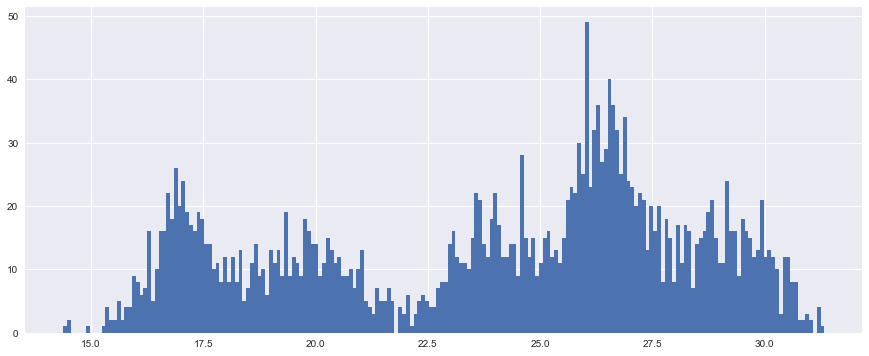

In [71]:
india.hist(india_avg,bins=200, figsize=(15, 6))

This is an example of Indian climate Avg Temp in last 100 years. I am trying to come up with some statistics that could show relativity of temp variations in India w.r.t globally.
